- Campos (colunas da base de dados)
    - S#	
    - Title	
    - Location	
    - Date	
    - Incident Area	
    - Open/Close Location	
    - Target	
    - Cause	
    - Summary	
    - Fatalities	
    - Injured	
    - Total victims	
    - Policeman Killed	
    - Age	
    - Employeed (Y/N)	
    - Employed at	
    - Mental Health 
    - Issues	
    - Race	
    - Gender	
    - Latitude	
    - Longitude

In [230]:
# importar pandas
import pandas as pd
import seaborn as sns

print("carregar a base de dados - ass Shootings Dataset Ver 5.csv")
df = pd.read_csv('/home/tiophil/Arquivos/BACKUP Philipy/UFRN/10 S/DS/us-mass-shootings-last-50-years/Mass-Shootings-Dataset-Ver-5.csv', sep=',')

carregar a base de dados - ass Shootings Dataset Ver 5.csv


In [231]:
def replace_gender(string):
    male = ["Male","M"]
    female = ["Female"]
    male_female = ["M/F","Male/Female"]
    unknown = ["Unknown"]

    if string in male:
        return "Male"
    elif string in female:
        return "Female"
    elif string in male_female:
        return "Male/Female"
    elif string in unknown:
        return "Unknown"
    
def replace_mental_health_issues(string):
    no = ["No"]
    yes = ["Yes"]
    unclear = ["Unclear"]
    unknown = ["Unknown","unknown"]

    if string in no:
        return "No"
    elif string in yes:
        return "Yes"
    elif string in unclear:
        return "Unclear"
    elif string in unknown:
        return "Unknown"

def replace_race(string):
    asian = ["Asian","Asian American","Asian American/Some other race"]
    black = ["Black","black","Black American or African American","Black American or African American/Unknown"]
    white = ["White","white","White American or European American","White American or European American/Some other Race"]
    latino = ["Latino"]
    other = ["Native American or Alaska Native","Other","Some other race","Two or more races"]
    unknown = ["Unknown"]

    if string in asian:
        return "Asian"
    elif string in black:
        return "Black"
    elif string in white:
        return "White"
    elif string in latino:
        return "Latino"
    elif string in other:
        return "Other"
    elif (string in unknown):
        return "Unknown"
    
def replace_location(string):
    open_place = ["Open"]
    close_place = ["Close"]
    both = ["Open+CLose","Open+Close"]

    if string in open_place:
        return "Open"
    elif string in close_place:
        return "Close"
    elif string in both:
        return "Both"

def replace_target(string):
    coworkers = ["Coworker's Family", "Coworkers", "Ex-Coworkers", "coworkers"]
    ex_girlfriend = ["Ex-GirlFriend", "Ex-Girlfriend", "Ex-Girlfriend & Family", "Ex-Girlfriend+random", "Ex-Wife", "Ex-Wife & Family", "Ex-girlfriend"]
    family = ["Family", "Family+random", "Family+students", "Family/Neighbors", "Girlfriend", "partner's family"]
    policeman = ["Policeman", "Policeman+Council Member", "police", "Marines", "Trooper"]
    students_teachers = ["Students", "Students+Parents", "Students+Teachers", "Teachers", "school girls"]
    children = ["Children"]
    women = ["women"]
    black_men = ["black men"]
    friends_neighbors = ["Friends", "neighbors"]
    random = ["Congresswoman", "Contestant", "House Owner", "Sikhs", "Social Workers", "TSA Officer", "basketball players", "birthday party bus", "club members", "drug dealer", "hunters", "lawyers", "monks", "party guests", "postmaster", "prayer group", "protestors", "psychologist+psychiatrist", "random", "rapper+random", "uninvited guests", "welding shop employees"]

    if string in coworkers:
        return "Coworkers"
    elif string in ex_girlfriend:
        return "Ex-Girlfriend"
    elif string in family:
        return "Family"
    elif string in policeman:
        return "Policeman"
    elif string in students_teachers:
        return "Students/Teachers"
    elif string in children:
        return "Children"
    elif string in women:
        return "Women"
    elif string in black_men:
        return "Black Men"
    elif string in friends_neighbors:
        return "Friends/Neighbors"
    elif string in random:
        return "Random"

print("Temos primeiramente que fazer o tratamento dos dados e padronizacao, podemos ver que temos muitos casos de dados nulos em algumas colunas")
print("Tambem e necessario dropar colunas que nao sao necessarias para a analise")

print("\n")
print(df.isnull().sum())

#Drop das colunas que nao sao necessarias
df = df.drop('Title',axis=1)
df = df.drop('Summary',axis=1)
df = df.drop('S#',axis=1)
df = df.drop('Employed at',axis=1)
df = df.drop('Employeed (Y/N)',axis=1)
df = df.drop('Incident Area',axis=1)

#renomeacao das colunas para uma melhor padronizacao
df = df.rename(index=str, columns={"Mental Health Issues": "mental_health_issues", "Open/Close Location": "open_close_location", "Policeman Killed": "policeman_killed", "Total victims":"total_victims"})
df = df.rename(index=str, columns=str.lower)

#Colocar os valores da coluna data em um formato que seja possivel trabalhar utilizando as funcoes das bibliotecas
df['date'] = pd.to_datetime(df.date)

#categorizacao e padronizacao dos valores dos campos
df['gender'] = df['gender'].apply(replace_gender)
df['mental_health_issues'] = df['mental_health_issues'].apply(replace_mental_health_issues)
df['race'] = df['race'].apply(replace_race)
df['open_close_location'] = df['open_close_location'].apply(replace_location)
df['target'] = df['target'].apply(replace_target)

#substituicao dos valores nulos
df['race'].fillna("Unknown", inplace=True)
df['cause'].fillna("unknown", inplace=True)
df['open_close_location'].fillna("Unknown", inplace=True)
df['target'].fillna("Unknown", inplace=True)

print("\n")
print("Apos o tratamento e categorizacao temos uma melhora nos dados nulos e uma boa padronizacao para trabalhar com os dados")
print(df.isnull().sum())

Temos primeiramente que fazer o tratamento dos dados e padronizacao, podemos ver que temos muitos casos de dados nulos em algumas colunas
Tambem e necessario dropar colunas que nao sao necessarias para a analise


S#                        0
Title                     0
Location                 45
Date                      0
Incident Area            62
Open/Close Location      28
Target                    5
Cause                    77
Summary                   0
Fatalities                0
Injured                   0
Total victims             0
Policeman Killed          6
Age                     144
Employeed (Y/N)         256
Employed at             282
Mental Health Issues      0
Race                      2
Gender                    0
Latitude                 20
Longitude                20
dtype: int64


Apos o tratamento e categorizacao temos uma melhora nos dados nulos e uma boa padronizacao para trabalhar com os dados
location                 45
date                      0
open_clo

Analise de fatalidades em ataques em massa


Quantidade maxima de fatalidades em um ataque em massa: 
59


Quantidade minima de fatalidades em um ataque em massa: 
0


Quantidade media de fatalidades em um ataque em massa: 
4.43653250774


Percentual de fatalidades acima da media: 
36.8421052632 %


Percentual de fatalidades abaixo da media: 
63.1578947368 %




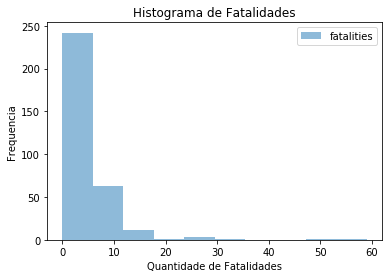

Ao longo do tempo: 


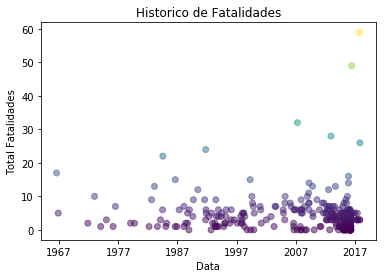

Analise de pessoas feridas em ataques em massa


Quantidade maxima de pessoas feridas em um ataque em massa: 
527


Quantidade minima de pessoas feridas em um ataque em massa: 
0


Quantidade media de pessoas feridas em um ataque em massa: 
6.17647058824


Percentual de pessoas feridas acima da quantidade media: 
17.0278637771 %


Percentual de pessoas feridas abaixo da quantidade media: 
82.9721362229 %




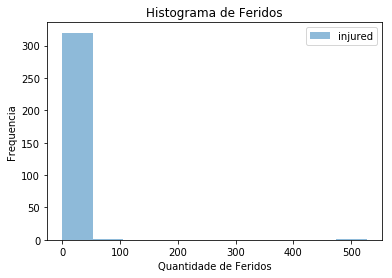

Ao longo do tempo: 


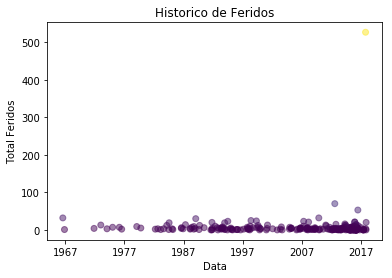

Historico de eventos (Total de Vitimas x Data): 


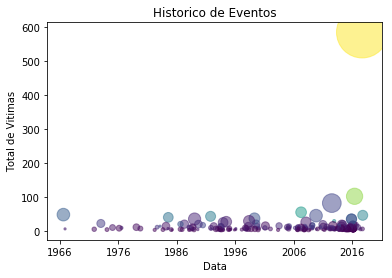

Colocaracao: Fatalidades
Tamanho: Feridos


In [197]:
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

df_victims = pd.DataFrame(df, columns=['date','injured','fatalities','total_victims'])

print('Analise de fatalidades em ataques em massa')
print('\n')

#Fatalities analise
columm_fatalities = df.fatalities

print('Quantidade maxima de fatalidades em um ataque em massa: ')
print(columm_fatalities.max())
print('\n')
print('Quantidade minima de fatalidades em um ataque em massa: ')
print(columm_fatalities.min())
print('\n')
print('Quantidade media de fatalidades em um ataque em massa: ')
print(columm_fatalities.mean())
print('\n')

print('Percentual de fatalidades acima da media: ')
print (float(columm_fatalities[(columm_fatalities>columm_fatalities.mean())].count())/float(columm_fatalities.count()))*100,'%'
print('\n')
print('Percentual de fatalidades abaixo da media: ')
print (float(columm_fatalities[(columm_fatalities<=columm_fatalities.mean())].count())/float(columm_fatalities.count()))*100,'%'
print('\n')

df_fatalities = pd.DataFrame(df, columns=['fatalities'])
df_fatalities.plot.hist(alpha=0.5)
plt.title('Histograma de Fatalidades')
plt.xlabel('Quantidade de Fatalidades')
plt.ylabel('Frequencia')
plt.show()

print('Ao longo do tempo: ')
scatter_plot = plt.scatter(df_victims['date'].tolist(), df_victims['fatalities'], alpha=0.5, c=df_victims['fatalities'])
plt.title('Historico de Fatalidades')
plt.xlabel('Data')
plt.ylabel('Total Fatalidades')                                                                                                                           
plt.show()


print('Analise de pessoas feridas em ataques em massa')
print('\n')

#Injured analise
columm_injured = df.injured

print('Quantidade maxima de pessoas feridas em um ataque em massa: ')
print(columm_injured.max())
print('\n')
print('Quantidade minima de pessoas feridas em um ataque em massa: ')
print(columm_injured.min())
print('\n')
print('Quantidade media de pessoas feridas em um ataque em massa: ')
print(columm_injured.mean())
print('\n')

print('Percentual de pessoas feridas acima da quantidade media: ')
print (float(columm_injured[(columm_injured>columm_injured.mean())].count())/float(columm_injured.count()))*100,'%'
print('\n')
print('Percentual de pessoas feridas abaixo da quantidade media: ')
print (float(columm_injured[(columm_injured<=columm_injured.mean())].count())/float(columm_injured.count()))*100,'%'
print('\n')

df_injured = pd.DataFrame(df, columns=['injured'])
df_injured.plot.hist(alpha=0.5)
plt.title('Histograma de Feridos')
plt.xlabel('Quantidade de Feridos')
plt.ylabel('Frequencia')
plt.show()

print('Ao longo do tempo: ')
scatter_plot = plt.scatter(df_victims['date'].tolist(), df_victims['injured'], alpha=0.5, c=df_victims['injured'])
plt.title('Historico de Feridos')
plt.xlabel('Data')
plt.ylabel('Total Feridos')                                                                                                                           
plt.show()

print('Historico de eventos (Total de Vitimas x Data): ')
scatter_plot = plt.scatter(df_victims['date'].tolist(), df_victims['total_victims'], alpha=0.5, c=df_victims['fatalities'], s=df_victims['injured']*5)
plt.title('Historico de Eventos')
plt.xlabel('Data')
plt.ylabel('Total de Vitimas')                                                                                                                           
plt.show()
print('Colocaracao: Fatalidades')
print('Tamanho: Feridos')


Total de vitimas causadas por homens
3096
Total de vitimas causadas por mulheres
38
Total de vitimas causadas por ambos
83
Total de vitimas causadas por desconhecidos
98
Total de vitimas nos eventos
3315


* Relação entre genero e total de vitimas:


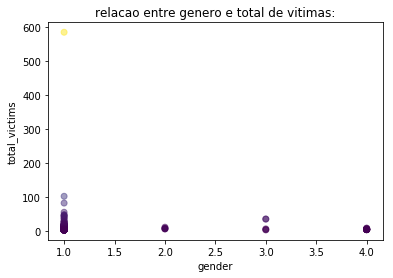

1 - Homens
2 - Mulheres
3 - Ambos
4 - Desconhecido


Porcentagem de vitimas em eventos causados por homens
93.3936651584
Porcentagem de vitimas em eventos causados por mulheres
1.14630467572
Porcentagem de vitimas em eventos causados por ambos
2.50377073906
Porcentagem de vitimas em eventos causados por desconhecidos
2.95625942685


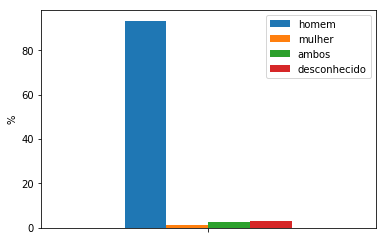

Porcentagem de homens que aparecem como causadores do evento: 
90.4024767802 %
Porcentagem de mulheres que aparecem como causadores do evento: 
1.5479876161 %
Porcentagem de ambos que aparecem como causadores do evento: 
1.5479876161 %
Porcentagem de genero desconhecidos que aparecem como causadores do evento: 
6.50154798762 %


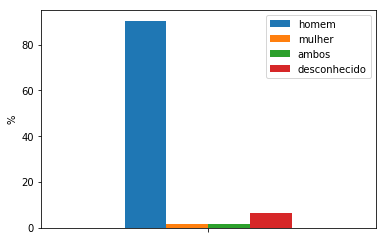

In [207]:
import numpy as np

def replace_gender(string):
    male = ["Male"]
    female = ["Female"]
    male_female = ["Male/Female"]
    unknown = ["Unknown"]

    if string in male:
        return 1
    elif string in female:
        return 2
    elif string in male_female:
        return 3
    elif string in unknown:
        return 4

df_gender_total_victims = pd.DataFrame(df, columns=['gender','total_victims'])
df_gender_total_victims['gender'] = df_gender_total_victims['gender'].apply(replace_gender)

print("Total de vitimas causadas por homens")
print(df_gender_total_victims[(df_gender_total_victims.gender==1)].total_victims.sum())
print("Total de vitimas causadas por mulheres")
print(df_gender_total_victims[(df_gender_total_victims.gender==2)].total_victims.sum())
print("Total de vitimas causadas por ambos")
print(df_gender_total_victims[(df_gender_total_victims.gender==3)].total_victims.sum())
print("Total de vitimas causadas por desconhecidos")
print(df_gender_total_victims[(df_gender_total_victims.gender==4)].total_victims.sum())
print("Total de vitimas nos eventos")
print(df_gender_total_victims.total_victims.sum())
print("\n")

print('* Relação entre genero e total de vitimas:')
scatter_plot = plt.scatter(df_gender_total_victims['gender'], df_gender_total_victims['total_victims'], alpha=0.5, c=df_gender_total_victims['total_victims'])
plt.title('relacao entre genero e total de vitimas:')
plt.ylabel('total_victims')
plt.xlabel('gender')
plt.show()
print('1 - Homens')
print('2 - Mulheres')
print('3 - Ambos')
print('4 - Desconhecido')
print('\n')

homem = float(df_gender_total_victims[(df_gender_total_victims.gender==1)].total_victims.sum())/float(df_gender_total_victims.total_victims.sum())*100
mulher = float(df_gender_total_victims[(df_gender_total_victims.gender==2)].total_victims.sum())/float(df_gender_total_victims.total_victims.sum())*100
ambos = float(df_gender_total_victims[(df_gender_total_victims.gender==3)].total_victims.sum())/float(df_gender_total_victims.total_victims.sum())*100
desconhecido = float(df_gender_total_victims[(df_gender_total_victims.gender==4)].total_victims.sum())/float(df_gender_total_victims.total_victims.sum())*100

print("Porcentagem de vitimas em eventos causados por homens")
print(homem)
print("Porcentagem de vitimas em eventos causados por mulheres")
print(mulher)
print("Porcentagem de vitimas em eventos causados por ambos")
print(ambos)
print("Porcentagem de vitimas em eventos causados por desconhecidos")
print(desconhecido)

dados = {'homem': homem,
        'mulher': mulher,
        'ambos': ambos,
        'desconhecido': desconhecido}
df_graph = pd.DataFrame(data=dados, index=[''], columns=['homem','mulher','ambos','desconhecido'])
df_graph.plot(kind='bar')
plt.ylabel('%')
plt.show()

homem = float(df_gender_total_victims[(df_gender_total_victims.gender==1)].gender.count())/float(df_gender_total_victims.gender.count())*100
mulher = float(df_gender_total_victims[(df_gender_total_victims.gender==2)].gender.count())/float(df_gender_total_victims.gender.count())*100
ambos = float(df_gender_total_victims[(df_gender_total_victims.gender==3)].gender.count())/float(df_gender_total_victims.gender.count())*100
desconhecido = float(df_gender_total_victims[(df_gender_total_victims.gender==4)].gender.count())/float(df_gender_total_victims.gender.count())*100

print("Porcentagem de homens que aparecem como causadores do evento: ")
print homem, "%"
print("Porcentagem de mulheres que aparecem como causadores do evento: ")
print mulher, "%"
print("Porcentagem de ambos que aparecem como causadores do evento: ")
print ambos, "%"
print("Porcentagem de genero desconhecidos que aparecem como causadores do evento: ")
print desconhecido, "%"

dados = {'homem': homem,
        'mulher': mulher,
        'ambos': ambos,
        'desconhecido': desconhecido}
df_graph = pd.DataFrame(data=dados, index=[''], columns=['homem','mulher','ambos','desconhecido'])
df_graph.plot(kind='bar')
plt.ylabel('%')
plt.show()

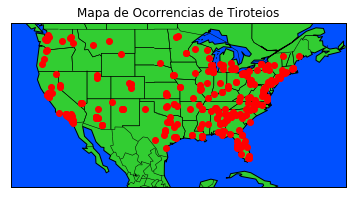

In [199]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                llcrnrlon=-130,urcrnrlon=-60,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='#32CD32',lake_color='#0050FF')
m.drawmapboundary(fill_color='#0050FF')

df_cordinates = pd.DataFrame(df, columns=['latitude','longitude'])
df_cordinates = df_cordinates.dropna()

for la, lo in zip(df_cordinates.latitude.tolist(), df_cordinates.longitude.tolist()):
    lat,lon = float(la),float(lo)
    x,y = m(lon,lat)
    m.plot(x,y, 'ro')

plt.title("Mapa de Ocorrencias de Tiroteios")
plt.show()

Quantidade maxima de policiais mortos:
5.0
Quantidade minima de policiais mortos:
0.0
Quantidade total de policiais mortos:
41.0
Quantidade de eventos que houve morte de policiais:
19
Quantidade media de policiais mortos:
0.129337539432
Essa quantidade de dados estao com a localidade nulas:
5
Sobrando apenas essa quantidade dados com a localizacao, para podermos mapear:
14


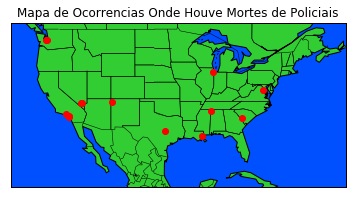

In [232]:
m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                llcrnrlon=-130,urcrnrlon=-60,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='#32CD32',lake_color='#0050FF')
m.drawmapboundary(fill_color='#0050FF')

df_cordinates = pd.DataFrame(df, columns=['policeman_killed','latitude','longitude'])

print("Quantidade maxima de policiais mortos:")
print(df_cordinates.policeman_killed.max())
print("Quantidade minima de policiais mortos:")
print(df_cordinates.policeman_killed.min())
print("Quantidade total de policiais mortos:")
print(df_cordinates.policeman_killed.sum())
print("Quantidade de eventos que houve morte de policiais:")
print(df_cordinates[(df_cordinates.policeman_killed>0)].policeman_killed.count())
print("Quantidade media de policiais mortos:")
print(df_cordinates.policeman_killed.mean())

print("Essa quantidade de dados estao com a localidade nulas:")
local_null = df_cordinates[(df_cordinates.policeman_killed>0)].latitude.isnull()
print(local_null[(local_null==True)].count())

print("Sobrando apenas essa quantidade dados com a localizacao, para podermos mapear:")
print(local_null[(local_null==False)].count())

df_cordinates = df_cordinates[(df_cordinates.policeman_killed>0)]
df_cordinates = df_cordinates.dropna()

for la, lo in zip(df_cordinates.latitude.tolist(), df_cordinates.longitude.tolist()):
    lat,lon = float(la),float(lo)
    x,y = m(lon,lat)
    m.plot(x,y, 'ro')

plt.title("Mapa de Ocorrencias Onde Houve Mortes de Policiais")
plt.show()

Analise das idades dos atacantes


Idade maxima que um atacante teve na data do evento: 
70.0
Idade minima que um atacante teve na data do evento: 
0.0
Ops alguém cadastrou uma idade errada na base de dados, vamos resolver esse problema filtrando para idades acima de 0

Idade minima que um atacante teve na data do evento: 
12.0
Idade media que um atacante teve na data do evento: 
31.8707303371


Percentual de fatalidades acima da media: 
50.0 %
Percentual de fatalidades abaixo da media: 
50.0 %


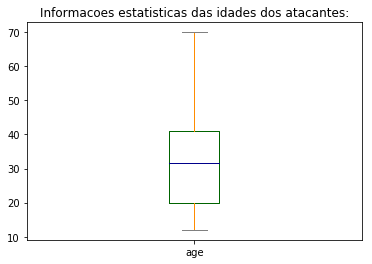

In [201]:
df_ages = pd.DataFrame(df, columns=['age'])

print('Analise das idades dos atacantes')
print('\n')

columm_age = df_ages.age
columm_age = columm_age.dropna()

print('Idade maxima que um atacante teve na data do evento: ')
print(columm_age.max())

print('Idade minima que um atacante teve na data do evento: ')
print(columm_age.min())
print("Ops alguém cadastrou uma idade errada na base de dados, vamos resolver esse problema filtrando para idades acima de 0\n")
print('Idade minima que um atacante teve na data do evento: ')
print(columm_age[(columm_age>0)].min())

columm_age = columm_age[(columm_age>0)]
print('Idade media que um atacante teve na data do evento: ')
print(columm_age.mean())
print("\n")
print('Percentual de fatalidades acima da media: ')
print (float(columm_age[(columm_age>columm_age.mean())].count())/float(columm_age.count()))*100,'%'
print('Percentual de fatalidades abaixo da media: ')
print (float(columm_age[(columm_age<=columm_age.mean())].count())/float(columm_age.count()))*100,'%'

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
columm_age.plot.box(color = color, sym='r+')
plt.title('Informacoes estatisticas das idades dos atacantes:')
plt.show()

Analise das racas dos atacantes


Total de vitimas em eventos causados por asiaticos
200
Total de vitimas em eventos causados  por negros
556
Total de vitimas em eventos causados  por brancos
2001
Total de vitimas em eventos causados  por latinos
49
Total de vitimas em eventos causados  por outras racas
306
Total de vitimas em eventos causados  por por racas nao informadas
203


* Relação entre raca e total de vitimas:


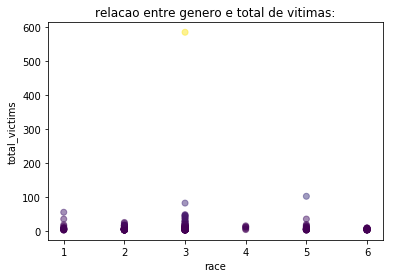

1 - asiaticos
2 - negros
3 - brancos
4 - latinos
5 - outras racas
6 - racas nao informadas


Porcentagem vitimas de asiaticos: 
6.03318250377 %
Porcentagem vitimas de negros: 
16.7722473605 %
Porcentagem vitimas de brancos: 
60.3619909502 %
Porcentagem vitimas de latinos: 
1.47812971342 %
Porcentagem vitimas de outros: 
9.23076923077 %
Porcentagem vitimas de racas nao informadas: 
6.12368024133 %


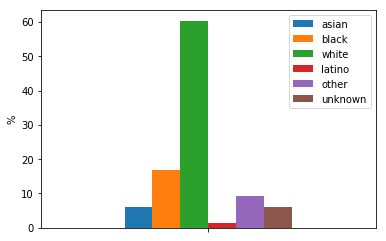

Porcentagem de asiaticos que aparecem como causadores do evento: 
5.57275541796 %
Porcentagem de negros que aparecem como causadores do evento: 
26.3157894737 %
Porcentagem de brancos que aparecem como causadores do evento: 
44.5820433437 %
Porcentagem de latinos que aparecem como causadores do evento: 
1.5479876161 %
Porcentagem de outros que aparecem como causadores do evento: 
8.35913312693 %
Porcentagem de racas nao informadas que aparecem como causadores do evento: 
13.6222910217 %


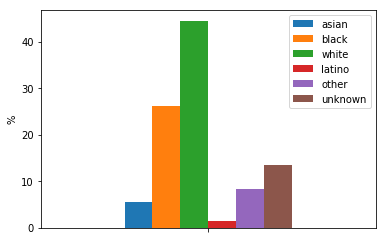

Mesmo com os dados apresentados podemos ver que existe uma correlacao baixa e linearmente negativa entre os dois fatores


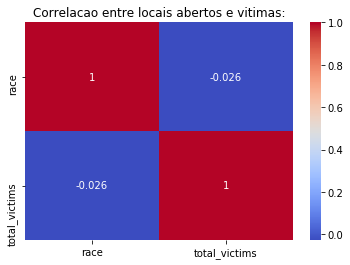

In [215]:
def replace_race(string):
    asian = ["Asian"]
    black = ["Black"]
    white = ["White"]
    latino = ["Latino"]
    other = ["Other"]
    unknown = ["Unknown"]

    if string in asian:
        return 1
    elif string in black:
        return 2
    elif string in white:
        return 3
    elif string in latino:
        return 4
    elif string in other:
        return 5
    elif string in unknown:
        return 6

df_race = pd.DataFrame(df, columns=['race','total_victims'])
df_race['race'] = df_race['race'].apply(replace_race)

print('Analise das racas dos atacantes')
print('\n')

print("Total de vitimas em eventos causados por asiaticos")
print(df_race[(df_race.race==1)].total_victims.sum())
print("Total de vitimas em eventos causados  por negros")
print(df_race[(df_race.race==2)].total_victims.sum())
print("Total de vitimas em eventos causados  por brancos")
print(df_race[(df_race.race==3)].total_victims.sum())
print("Total de vitimas em eventos causados  por latinos")
print(df_race[(df_race.race==4)].total_victims.sum())
print("Total de vitimas em eventos causados  por outras racas")
print(df_race[(df_race.race==5)].total_victims.sum())
print("Total de vitimas em eventos causados  por por racas nao informadas")
print(df_race[(df_race.race==6)].total_victims.sum())

print("\n")
print('* Relação entre raca e total de vitimas:')
scatter_plot = plt.scatter(df_race['race'], df_race['total_victims'], alpha=0.5, c=df_race['total_victims'])
plt.title('relacao entre genero e total de vitimas:')
plt.ylabel('total_victims')
plt.xlabel('race')
plt.show()
print('1 - asiaticos')
print('2 - negros')
print('3 - brancos')
print('4 - latinos')
print('5 - outras racas')
print('6 - racas nao informadas')
print('\n')

asian = float(df_race[(df_race.race==1)].total_victims.sum())/float(df_race.total_victims.sum())*100
black = float(df_race[(df_race.race==2)].total_victims.sum())/float(df_race.total_victims.sum())*100
white = float(df_race[(df_race.race==3)].total_victims.sum())/float(df_race.total_victims.sum())*100
latino = float(df_race[(df_race.race==4)].total_victims.sum())/float(df_race.total_victims.sum())*100
other = float(df_race[(df_race.race==5)].total_victims.sum())/float(df_race.total_victims.sum())*100 
unknown = float(df_race[(df_race.race==6)].total_victims.sum())/float(df_race.total_victims.sum())*100

print("Porcentagem vitimas de asiaticos: ")
print asian, "%"
print("Porcentagem vitimas de negros: ")
print black, "%"
print("Porcentagem vitimas de brancos: ")
print white, "%"
print("Porcentagem vitimas de latinos: ")
print latino, "%"
print("Porcentagem vitimas de outros: ")
print other, "%"
print("Porcentagem vitimas de racas nao informadas: ")
print unknown, "%"

dados = {'asian': asian,
        'black': black,
        'white': white,
        'latino': latino,
        'other': other,
        'unknown': unknown}
df_graph = pd.DataFrame(data=dados, index=[''], columns=['asian','black','white','latino','other','unknown'])
df_graph.plot(kind='bar')
plt.ylabel('%')
plt.show()

asian = float(df_race[(df_race.race==1)].race.count())/float(df_race.race.count())*100
black = float(df_race[(df_race.race==2)].race.count())/float(df_race.race.count())*100
white = float(df_race[(df_race.race==3)].race.count())/float(df_race.race.count())*100
latino = float(df_race[(df_race.race==4)].race.count())/float(df_race.race.count())*100
other = float(df_race[(df_race.race==5)].race.count())/float(df_race.race.count())*100 
unknown = float(df_race[(df_race.race==6)].race.count())/float(df_race.race.count())*100

print("Porcentagem de asiaticos que aparecem como causadores do evento: ")
print asian, "%"
print("Porcentagem de negros que aparecem como causadores do evento: ")
print black, "%"
print("Porcentagem de brancos que aparecem como causadores do evento: ")
print white, "%"
print("Porcentagem de latinos que aparecem como causadores do evento: ")
print latino, "%"
print("Porcentagem de outros que aparecem como causadores do evento: ")
print other, "%"
print("Porcentagem de racas nao informadas que aparecem como causadores do evento: ")
print unknown, "%"

dados = {'asian': asian,
        'black': black,
        'white': white,
        'latino': latino,
        'other': other,
        'unknown': unknown}
df_graph = pd.DataFrame(data=dados, index=[''], columns=['asian','black','white','latino','other','unknown'])
df_graph.plot(kind='bar')
plt.ylabel('%')
plt.show()

print("Mesmo com os dados apresentados podemos ver que existe uma correlacao baixa e linearmente negativa entre os dois fatores")
sns.heatmap(df_race.corr(), cmap='coolwarm', annot=True)
plt.title('Correlacao entre locais abertos e vitimas:')
plt.show()

Analise do problema de saude mental dos atacantes


Total de vitimas em eventos causados por pessoas com problemas mentais
1240
Total de vitimas em eventos causados por pessoas sem problemas mentais
648
Total de vitimas em eventos causados por pessoas com problemas de saude mental nao definidos
815
Total de vitimas em eventos causados por pessoas com desconhecidos problemas de saude mental
612


* Relação entre problema de saude mental e total de vitimas:


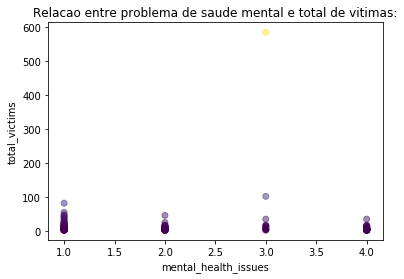

1 - Sim
2 - Nao
3 - Nao definido
4 - Desconhecido


Porcentagem vitimas causadas por pessoas com problemas mentais: 
37.4057315234 %
Porcentagem vitimas causadas por pessoas sem problemas mentais: 
19.5475113122 %
Porcentagem vitimas causadas por pessoas com problemas de saude mental nao definidos: 
24.5852187029 %
Porcentagem vitimas causadas por pessoas com desconhecidos problemas de saude mental: 
18.4615384615 %


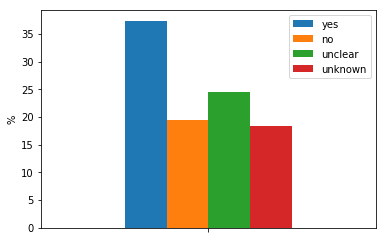

Porcentagem de pessoas com problemas mentais que aparecem como causadores do evento: 
32.8173374613 %
Porcentagem de pessoas sem problemas mentais que aparecem como causadores do evento: 
28.7925696594 %
Porcentagem de pessoas com problemas de saude mental nao definidos que aparecem como causadores do evento: 
4.02476780186 %
Porcentagem de pessoas com desconhecidos problemas de saude mental que aparecem como causadores do evento: 
34.3653250774 %


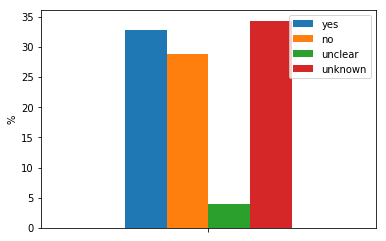

In [209]:
def replace_mental_health_issues(string):
    no = ["No"]
    yes = ["Yes"]
    unclear = ["Unclear"]
    unknown = ["Unknown"]

    if string in yes:
        return 1
    elif string in no:
        return 2
    elif string in unclear:
        return 3
    elif string in unknown:
        return 4

df_mental_health_issues = pd.DataFrame(df, columns=['mental_health_issues','total_victims'])
df_mental_health_issues['mental_health_issues'] = df_mental_health_issues['mental_health_issues'].apply(replace_mental_health_issues)

print('Analise do problema de saude mental dos atacantes')
print('\n')

print("Total de vitimas em eventos causados por pessoas com problemas mentais")
print(df_mental_health_issues[(df_mental_health_issues.mental_health_issues==1)].total_victims.sum())
print("Total de vitimas em eventos causados por pessoas sem problemas mentais")
print(df_mental_health_issues[(df_mental_health_issues.mental_health_issues==2)].total_victims.sum())
print("Total de vitimas em eventos causados por pessoas com problemas de saude mental nao definidos")
print(df_mental_health_issues[(df_mental_health_issues.mental_health_issues==3)].total_victims.sum())
print("Total de vitimas em eventos causados por pessoas com desconhecidos problemas de saude mental")
print(df_mental_health_issues[(df_mental_health_issues.mental_health_issues==4)].total_victims.sum())

print("\n")
print('* Relação entre problema de saude mental e total de vitimas:')
scatter_plot = plt.scatter(df_mental_health_issues['mental_health_issues'], df_mental_health_issues['total_victims'], alpha=0.5, c=df_mental_health_issues['total_victims'])
plt.title('Relacao entre problema de saude mental e total de vitimas:')
plt.ylabel('total_victims')
plt.xlabel('mental_health_issues')
plt.show()
print('1 - Sim')
print('2 - Nao')
print('3 - Nao definido')
print('4 - Desconhecido')
print('\n')

yes = float(df_mental_health_issues[(df_mental_health_issues.mental_health_issues==1)].total_victims.sum())/float(df_mental_health_issues.total_victims.sum())*100
no = float(df_mental_health_issues[(df_mental_health_issues.mental_health_issues==2)].total_victims.sum())/float(df_mental_health_issues.total_victims.sum())*100
unclear = float(df_mental_health_issues[(df_mental_health_issues.mental_health_issues==3)].total_victims.sum())/float(df_mental_health_issues.total_victims.sum())*100
unknown = float(df_mental_health_issues[(df_mental_health_issues.mental_health_issues==4)].total_victims.sum())/float(df_mental_health_issues.total_victims.sum())*100

print("Porcentagem vitimas causadas por pessoas com problemas mentais: ")
print yes, "%"
print("Porcentagem vitimas causadas por pessoas sem problemas mentais: ")
print no, "%"
print("Porcentagem vitimas causadas por pessoas com problemas de saude mental nao definidos: ")
print unclear, "%"
print("Porcentagem vitimas causadas por pessoas com desconhecidos problemas de saude mental: ")
print unknown, "%"

dados = {'yes': yes,
        'no': no,
        'unclear': unclear,
        'unknown': unknown}
df_graph = pd.DataFrame(data=dados, index=[''], columns=['yes','no','unclear','unknown'])
df_graph.plot(kind='bar')
plt.ylabel('%')
plt.show()

yes = float(df_mental_health_issues[(df_mental_health_issues.mental_health_issues==1)].mental_health_issues.count())/float(df_mental_health_issues.mental_health_issues.count())*100
no = float(df_mental_health_issues[(df_mental_health_issues.mental_health_issues==2)].mental_health_issues.count())/float(df_mental_health_issues.mental_health_issues.count())*100
unclear = float(df_mental_health_issues[(df_mental_health_issues.mental_health_issues==3)].mental_health_issues.count())/float(df_mental_health_issues.mental_health_issues.count())*100
unknown = float(df_mental_health_issues[(df_mental_health_issues.mental_health_issues==4)].mental_health_issues.count())/float(df_mental_health_issues.mental_health_issues.count())*100

print("Porcentagem de pessoas com problemas mentais que aparecem como causadores do evento: ")
print yes, "%"
print("Porcentagem de pessoas sem problemas mentais que aparecem como causadores do evento: ")
print no, "%"
print("Porcentagem de pessoas com problemas de saude mental nao definidos que aparecem como causadores do evento: ")
print unclear, "%"
print("Porcentagem de pessoas com desconhecidos problemas de saude mental que aparecem como causadores do evento: ")
print unknown, "%"

dados = {'yes': yes,
        'no': no,
        'unclear': unclear,
        'unknown': unknown}
df_graph = pd.DataFrame(data=dados, index=[''], columns=['yes','no','unclear','unknown'])
df_graph.plot(kind='bar')
plt.ylabel('%')
plt.show()

Analise de alvos dos tiroteios


Total de colegas de trabalho vitimados
211
Total de ex-namorados(as) vitimados
99
Total de familia vitimadas
206
Total de policiais/militares vitimados como alvo
92
Total de estudantes e professores vitimados
350
Total de criancas vitimadas
25
Total de mulheres vitimadas
5
Total de homens negros vitimados
5
Total de amigos e vizinhos vitimados
24
Total de outros vitimados
2272


* Relação alvos e total de vitimas:


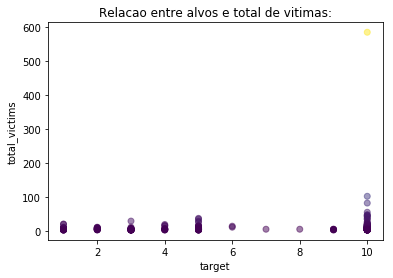

1 - colegas de trabalho
2 - ex-namorados(as)
3 - familia
4 - policiais/militares
5 - estudantes e professores
6 - criancas
7 - mulheres
8 - homens negros
9 - amigos e vizinhos
10 - outros


Porcentagem de colegas de trabalho vitimados: 
6.36500754148 %
Porcentagem de ex-namorados(as) vitimados: 
2.98642533937 %
Porcentagem de familia vitimadas: 
6.21417797888 %
Porcentagem de policiais/militares vitimados como alvo: 
2.77526395173 %
Porcentagem de estudantes e professores vitimados: 
10.5580693816 %
Porcentagem de criancas vitimadas: 
0.754147812971 %
Porcentagem de mulheres vitimadas: 
0.150829562594 %
Porcentagem de homens negros vitimados: 
0.150829562594 %
Porcentagem de amigos e vizinhos vitimados: 
0.723981900452 %
Porcentagem de outros vitimados: 
68.5369532428 %


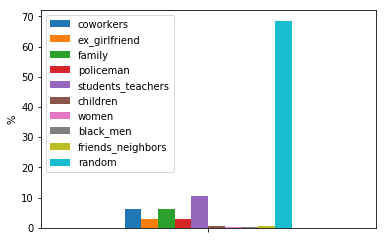

In [210]:
def replace_target(string):
    coworkers = ["Coworkers"]
    ex_girlfriend = ["Ex-Girlfriend"]
    family = ["Family"]
    policeman = ["Policeman"]
    students_teachers = ["Students/Teachers"]
    children = ["Children"]
    women = ["Women"]
    black_men = ["Black Men"]
    friends_neighbors = ["Friends/Neighbors"]
    random = ["Random"]

    if string in coworkers:
        return 1
    elif string in ex_girlfriend:
        return 2
    elif string in family:
        return 3
    elif string in policeman:
        return 4
    elif string in students_teachers:
        return 5
    elif string in children:
        return 6
    elif string in women:
        return 7
    elif string in black_men:
        return 8
    elif string in friends_neighbors:
        return 9
    elif string in random:
        return 10
    
df_target = pd.DataFrame(df, columns=['target','total_victims'])
df_target['target'] = df_target['target'].apply(replace_target)

print('Analise de alvos dos tiroteios')
print('\n')

print("Total de colegas de trabalho vitimados")
print(df_target[(df_target.target==1)].total_victims.sum())
print("Total de ex-namorados(as) vitimados")
print(df_target[(df_target.target==2)].total_victims.sum())
print("Total de familia vitimadas")
print(df_target[(df_target.target==3)].total_victims.sum())
print("Total de policiais/militares vitimados como alvo")
print(df_target[(df_target.target==4)].total_victims.sum())
print("Total de estudantes e professores vitimados")
print(df_target[(df_target.target==5)].total_victims.sum())
print("Total de criancas vitimadas")
print(df_target[(df_target.target==6)].total_victims.sum())
print("Total de mulheres vitimadas")
print(df_target[(df_target.target==7)].total_victims.sum())
print("Total de homens negros vitimados")
print(df_target[(df_target.target==8)].total_victims.sum())
print("Total de amigos e vizinhos vitimados")
print(df_target[(df_target.target==9)].total_victims.sum())
print("Total de outros vitimados")
print(df_target[(df_target.target==10)].total_victims.sum())

print("\n")
print('* Relação alvos e total de vitimas:')
scatter_plot = plt.scatter(df_target['target'], df_target['total_victims'], alpha=0.5, c=df_target['total_victims'])
plt.title('Relacao entre alvos e total de vitimas:')
plt.ylabel('total_victims')
plt.xlabel('target')
plt.show()
print('1 - colegas de trabalho')
print('2 - ex-namorados(as)')
print('3 - familia')
print('4 - policiais/militares')
print('5 - estudantes e professores')
print('6 - criancas')
print('7 - mulheres')
print('8 - homens negros')
print('9 - amigos e vizinhos')
print('10 - outros')
print('\n')

coworkers = float(df_target[(df_target.target==1)].total_victims.sum())/float(df_target.total_victims.sum())*100
ex_girlfriend = float(df_target[(df_target.target==2)].total_victims.sum())/float(df_target.total_victims.sum())*100
family = float(df_target[(df_target.target==3)].total_victims.sum())/float(df_target.total_victims.sum())*100
policeman = float(df_target[(df_target.target==4)].total_victims.sum())/float(df_target.total_victims.sum())*100
students_teachers = float(df_target[(df_target.target==5)].total_victims.sum())/float(df_target.total_victims.sum())*100
children = float(df_target[(df_target.target==6)].total_victims.sum())/float(df_target.total_victims.sum())*100
women = float(df_target[(df_target.target==7)].total_victims.sum())/float(df_target.total_victims.sum())*100
black_men = float(df_target[(df_target.target==8)].total_victims.sum())/float(df_target.total_victims.sum())*100
friends_neighbors = float(df_target[(df_target.target==9)].total_victims.sum())/float(df_target.total_victims.sum())*100
random = float(df_target[(df_target.target==10)].total_victims.sum())/float(df_target.total_victims.sum())*100

print("Porcentagem de colegas de trabalho vitimados: ")
print coworkers, "%"
print("Porcentagem de ex-namorados(as) vitimados: ")
print ex_girlfriend, "%"
print("Porcentagem de familia vitimadas: ")
print family, "%"
print("Porcentagem de policiais/militares vitimados como alvo: ")
print policeman, "%"
print("Porcentagem de estudantes e professores vitimados: ")
print students_teachers, "%"
print("Porcentagem de criancas vitimadas: ")
print children, "%"
print("Porcentagem de mulheres vitimadas: ")
print women, "%"
print("Porcentagem de homens negros vitimados: ")
print black_men, "%"
print("Porcentagem de amigos e vizinhos vitimados: ")
print friends_neighbors, "%"
print("Porcentagem de outros vitimados: ")
print random, "%"

dados = {'coworkers': coworkers,
        'ex_girlfriend': ex_girlfriend,
        'family': family,
        'policeman': policeman,
        'students_teachers': students_teachers,
        'children': children,
        'women': women,
        'black_men': black_men,
        'friends_neighbors': friends_neighbors,
        'random': random}
df_graph = pd.DataFrame(data=dados, index=[''], columns=['coworkers','ex_girlfriend','family','policeman','students_teachers','children','women','black_men','friends_neighbors','random'])
df_graph.plot(kind='bar')
plt.ylabel('%')
plt.show()

Analise dos locais de ataques


Total de vitimas em locais abertos
1086
Total de vitimas em locais fechados
1849
Total de vitimas em ambos locais aberto e fechado
191


* Relação entre locais abertos e fechados e total de vitimas:


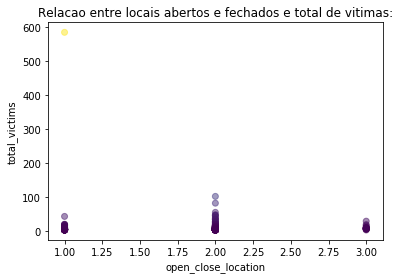

1 - Aberto
2 - Fechado
3 - Ambos


Porcentagem de vitimas em locais abertos: 
32.7601809955 %
Porcentagem de vitimas em locais fechados: 
55.7767722474 %
Porcentagem de vitimas em ambos locais aberto e fechado: 
5.7616892911 %


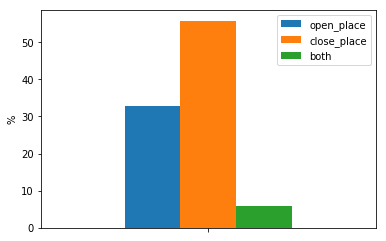

Porcentagem de eventos que houve vitimas em locais abertos: 
26.4406779661 %
Porcentagem de eventos que houve vitimas em locais fechados: 
66.7796610169 %
Porcentagem de eventos que houve vitimas em ambos locais aberto e fechado: 
6.77966101695 %


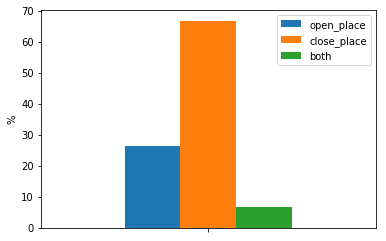

Com os resultados apresentados podemos ver que existe uma correlacao entre os dois fatores vistos: 


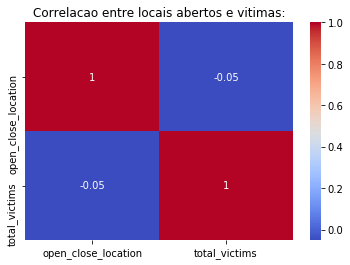

In [216]:
def replace_location(string):
    open_place = ["Open"]
    close_place = ["Close"]
    both = ["Both"]

    if string in open_place:
        return 1
    elif string in close_place:
        return 2
    elif string in both:
        return 3

df_location = pd.DataFrame(df, columns=['open_close_location','total_victims'])
df_location['open_close_location'] = df_location['open_close_location'].apply(replace_location)

print('Analise dos locais de ataques')
print('\n')

print("Total de vitimas em locais abertos")
print(df_location[(df_location.open_close_location==1)].total_victims.sum())
print("Total de vitimas em locais fechados")
print(df_location[(df_location.open_close_location==2)].total_victims.sum())
print("Total de vitimas em ambos locais aberto e fechado")
print(df_location[(df_location.open_close_location==3)].total_victims.sum())

print("\n")
print('* Relação entre locais abertos e fechados e total de vitimas:')
scatter_plot = plt.scatter(df_location['open_close_location'], df_location['total_victims'], alpha=0.5, c=df_location['total_victims'])
plt.title('Relacao entre locais abertos e fechados e total de vitimas:')
plt.ylabel('total_victims')
plt.xlabel('open_close_location')
plt.show()
print('1 - Aberto')
print('2 - Fechado')
print('3 - Ambos')
print('\n')

open_place = float(df_location[(df_location.open_close_location==1)].total_victims.sum())/float(df_location.total_victims.sum())*100
close_place = float(df_location[(df_location.open_close_location==2)].total_victims.sum())/float(df_location.total_victims.sum())*100
both = float(df_location[(df_location.open_close_location==3)].total_victims.sum())/float(df_location.total_victims.sum())*100

print("Porcentagem de vitimas em locais abertos: ")
print open_place, "%"
print("Porcentagem de vitimas em locais fechados: ")
print close_place, "%"
print("Porcentagem de vitimas em ambos locais aberto e fechado: ")
print both, "%"

dados = {'open_place': open_place,
        'close_place': close_place,
        'both': both}
df_graph = pd.DataFrame(data=dados, index=[''], columns=['open_place','close_place','both'])
df_graph.plot(kind='bar')
plt.ylabel('%')
plt.show()

open_place = float(df_location[(df_location.open_close_location==1)].open_close_location.count())/float(df_location.open_close_location.count())*100
close_place = float(df_location[(df_location.open_close_location==2)].open_close_location.count())/float(df_location.open_close_location.count())*100
both = float(df_location[(df_location.open_close_location==3)].open_close_location.count())/float(df_location.open_close_location.count())*100

print("Porcentagem de eventos que houve vitimas em locais abertos: ")
print open_place, "%"
print("Porcentagem de eventos que houve vitimas em locais fechados: ")
print close_place, "%"
print("Porcentagem de eventos que houve vitimas em ambos locais aberto e fechado: ")
print both, "%"

dados = {'open_place': open_place,
        'close_place': close_place,
        'both': both}
df_graph = pd.DataFrame(data=dados, index=[''], columns=['open_place','close_place','both'])
df_graph.plot(kind='bar')
plt.ylabel('%')
plt.show()

print("Com os resultados apresentados podemos ver que existe uma correlacao entre os dois fatores vistos: ")
sns.heatmap(df_location.corr(), cmap='coolwarm', annot=True)
plt.title('Correlacao entre locais abertos e vitimas:')
plt.show()